<a href="https://colab.research.google.com/github/Sahana200301/CODSOFT/blob/main/CODSOFT_TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from imblearn.under_sampling import RandomUnderSampler

In [38]:
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Analysis

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [40]:
data.shape

(284807, 31)

In [41]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [42]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [43]:
non_fraud = data[data.Class == 0]
fraud = data[data.Class == 1]
print("non fraud : ",non_fraud.shape)
print("fraud : ",fraud.shape)

non fraud :  (284315, 31)
fraud :  (492, 31)


<ipython-input-44-f27959cbf074>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




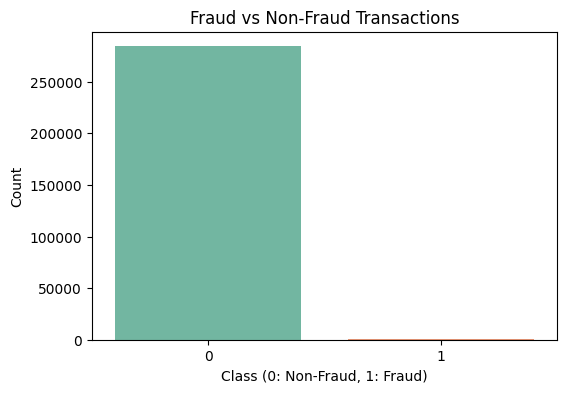

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Class', palette='Set2')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

<ipython-input-45-8094cfbb4e29>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




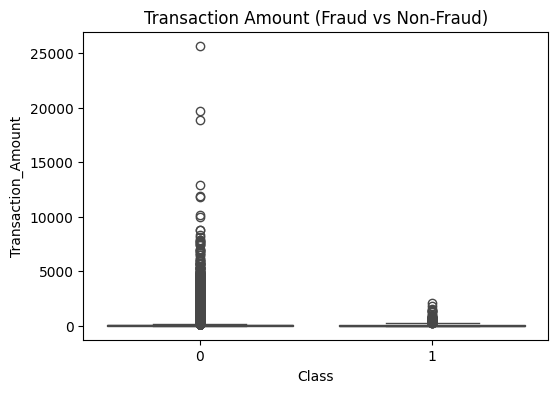

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Class', y='Amount', palette='Set1')
plt.title('Transaction Amount (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction_Amount')
plt.show()

# Logistic Regression for Imbalanced Dataset

In [53]:
X = data.drop(columns='Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

X_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, X_train_pred)
print('Accuracy on Training Data (Imbalanced):', training_accuracy)

X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, X_test_pred)
print('Accuracy Score on Test Data (Imbalanced):', test_accuracy)

print("\nClassification Report on test Data (Imbalanced):\n")
print(classification_report(y_test, X_test_pred, target_names=["Genuine", "Fraudulent"]))

Accuracy on Training Data (Imbalanced): 0.9992889903223683
Accuracy Score on Test Data (Imbalanced): 0.9992099996488887

Classification Report on test Data (Imbalanced):

              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     56864
  Fraudulent       0.84      0.67      0.75        98

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# undersampling to balance the dataset

In [54]:
pip install imbalanced-learn

In [55]:
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Random Undersampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = under_sampler.fit_resample(X_train, y_train)
print("Class distribution after undersampling:", y_train_balanced.value_counts())

Class distribution after undersampling: Class
0    344
1    344
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



# Logistic Regression for Balanced Dataset

In [56]:
X = data.drop(columns='Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)
print("Balanced X_train shape:", X_train_balanced.shape)
print("Balanced y_train shape:", y_train_balanced.shape)

Balanced X_train shape: (688, 30)
Balanced y_train shape: (688,)


In [57]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = under_sampler.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)
X_train_pred = model.predict(X_train_balanced)
training_accuracy = accuracy_score(X_train_pred, y_train_balanced)
print('Accuracy on Training Data (balanced): ', training_accuracy)

X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(X_test_pred, y_test)
print('Accuracy Score on Test Data (balanced):', test_accuracy)

print("\nClassification Report on Test Data (balanced):\n")
print(classification_report(y_test, X_test_pred, target_names=["Genuine", "Fraudulent"]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy on Training Data (balanced):  0.9390862944162437
Accuracy Score on Test Data (balanced): 0.9572170920964854

Classification Report on Test Data (balanced):

              precision    recall  f1-score   support

     Genuine       1.00      0.96      0.98     56864
  Fraudulent       0.04      0.93      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962



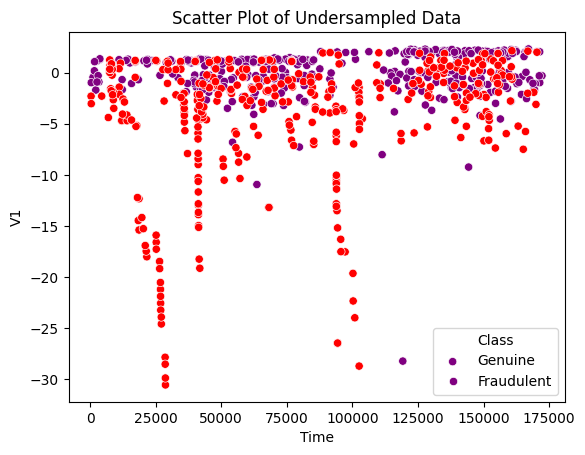

In [66]:
balanced_data = pd.DataFrame(X_train_balanced, columns=X.columns)
balanced_data['Class'] = y_train_balanced

sns.scatterplot(data=balanced_data, x=balanced_data.columns[0], y=balanced_data.columns[1], hue='Class', palette={0: 'purple', 1: 'red'})
plt.title('Scatter Plot of Undersampled Data')
plt.xlabel(balanced_data.columns[0])
plt.ylabel(balanced_data.columns[1])
plt.legend(title='Class', labels=['Genuine', 'Fraudulent'])
plt.show()